In [1]:
import numpy as np
import scipy.integrate as spqd
import matplotlib.pyplot as plt
%matplotlib inline

# Part Two: Taylor Series 

You might remember from Calculus II the idea of a Taylor series associated with a function.  We are going to revisit that concept and expand on it since Taylor series will be a major part of this course.  So to get started, for a function $f(x)$ which is smooth, i.e. infinitely differentiable, in some interval say $[x_{0}-\delta,x_{0}+\delta]$, we say $f(x)$ has a Taylor series _ around _ $x_{0}$ if on the interval we can write

$$
f(x) = \sum_{j=0}^{\infty}\left.\frac{d^{j}f}{dx^{j}}\right|_{x=x_{0}}\frac{(x-x_{0})^{j}}{j!}, ~ x\in[x_{0}-\delta,x_{0}+\delta].
$$

Classic examples of this are the Taylor series around $x_{0}=0$ (thus also known as _ MacLaurin series _), for $\sin(x)$, $\cos(x)$, and $e^{x}$ which are 

\begin{align*}
\sin(x) = & \sum_{j=0}^{\infty}\frac{(-1)^{j}x^{2j+1}}{(2j+1)!}\\
\cos(x) = & \sum_{j=0}^{\infty}\frac{(-1)^{j}x^{2j}}{(2j)!}\\
e^{x} = & \sum_{j=0}^{\infty} \frac{x^{j}}{j!}.
\end{align*}

Here $\delta = \infty$, which doesn't strictly make sense, but only really means that we are saying the sums converge for any point $x\in \mathbb{R}$.

_ Problem _: If $i$ is the imaginary number such that $i^{2}=-1$, then show Euler's formula 

$$
e^{ix} = \cos(x) + i \sin(x).
$$

To do this, you need to use the fact that $i^{2}=-1$, $i^{3}=-i$, and $i^{4}=1$.  Then you need to use the fact that 

$$
e^{ix} = \sum_{j=0}^{\infty}\frac{i^{j}x^{j}}{j!}.
$$

Another classic result is the Taylor series for a geometric series.  This is given by 

$$
\frac{1}{1-x} = \sum_{j=0}^{\infty} x^{j}, ~ |x|<1.
$$

So, again, $x_{0}=0$, but now we see that $\delta<1$.  This makes this expansion look like it is of limited use, but in fact, it is super handy.  For example, say  I give you the function

$$
f(x) = \frac{1}{2-3x}.
$$

Suppose I want the Taylor series of this function around any point $x_{0}\neq 2/3$.  Now while you can of course start taking derivative after derivative, this is not at all efficient.  Instead here is what you should do.

\begin{align*}
f(x) = & \frac{1}{2-3x}\\
= & \frac{1}{2-3(x-x_{0}+x_{0})}\\
= & \frac{1}{2-3x_{0}-3(x-x_{0})}\\
= & \frac{1}{2-3x_{0}}\frac{1}{1 - \left(\frac{3(x-x_{0})}{2-3x_{0}} \right)}\\
= & \frac{1}{2-3x_{0}}\sum_{j=0}^{\infty} \frac{3^{j}(x-x_{0})^{j}}{(2-3x_{0})^{j}}\\
= & \sum_{j=0}^{\infty} \frac{3^{j}}{(2-3x_{0})^{j+1}}(x-x_{0})^{j}
\end{align*}

with the stipulation that 

$$
\left|\frac{3(x-x_{0})}{2-3x_{0}}\right|<1,
$$

or equivalently 

$$
x_{0} -\frac{1}{3}\left|2-3x_{0}\right|< x < x_{0} +\frac{1}{3}\left|2-3x_{0}\right|.
$$

Thus, by using a base form, we can not only readily compute the Taylor series in a very few number of steps, but we can also determine the interval of convergence for the series.  

_Problem_ : Find the Taylor series of 
    
$$
f(x) = \frac{1}{4+7x},
$$

around $x_{0}$.  Find the interval of convergence as well.  

So, okay, great, there are such things as Taylor series.  What can we use them for?  The best answer to that question comes via another question.  What is $\sin(.1)$?  Now, we know $\sin(0)=0$, and we know $\sin(\pi/6)=.5$.  But what about $\sin(.1)$?  So, if we use the Taylor series from above, we have that 

$$
\sin(x) = x - \frac{x^{3}}{3!} + \frac{x^{5}}{5!} - \cdots
$$

Thus, one answer to the question is

$$
\sin(.1) = .1 - \frac{(.1)^{3}}{3!} + \frac{(.1)^{5}}{5!} - \cdots
$$

So, hypothetically, I can just keep computing terms of the Taylor series, and if I am willing to do this forever, I can finally know what $\sin(.1)$ is.  So that in principle is the power of Taylor series.  Instead of having to compute something hard, i.e. $\sin(.1)$, we can compute easy things in the series an infinite number of times. 

Of course, no one lives forever.  So doing something an infinite number of times becomes impractical.  Thus, as with so many things in life, we have to decide on a compromise that is good enough.  Said another way, we have to approximate.  To do this, we just start cutting off terms in the Taylor series expansion for $\sin(x)$.  What I mean by this is we say 

$$
\sin(.1) \approx .1
$$

or, including the next term, we might try

$$
\sin(.1) \approx .1 - \frac{(.1)^{3}}{3!}
$$

So, let's quickly use Python to see where this goes.

In [2]:
print("Approximation to sin(.1) is %1.15f" %.1)
print("Approximation to sin(.1) is %1.15f" %(.1 - (.1)**3./6))
print("Approximation to sin(.1) is %1.15f" %(.1 - (.1)**3./6 + (.1)**5./120))
print("Approximation to sin(.1) is %1.15f" %(.1 - (.1)**3./6 + (.1)**5./120 - (.1)**7./(42*120)))

Approximation to sin(.1) is 0.100000000000000
Approximation to sin(.1) is 0.099833333333333
Approximation to sin(.1) is 0.099833416666667
Approximation to sin(.1) is 0.099833416646825


So, while we do not actually know what $\sin(.1)$ is, we do see that as we keep taking more terms of the Taylor series, we get what looks to be convergence to a particular value.  Ostensibly, if we keep adding on more terms, we would keep getting more digits, and so again, while we would never know exactly what the true value is, we could _ approximate _ it to whatever degree of accuracy we might want.  

In this vein, we can talk about defining whole functions using Taylor series to approximate other ones.  So, we can say

$$
\sin(x) \approx T_{2n+1}(x;0), ~ T_{2n+1}(x;0) = \sum_{j=0}^{n}\frac{(-1)^{j}x^{2j+1}}{(2j+1)!}.
$$

So, let's see how this works.  

In [4]:
def tn_approx(x,n):
    tot = 1.
    term = 1.
    for jj in range(1,n+1):
        term *= -x**2./((2*jj+1)*(2*jj))
        tot += term
    return x*tot

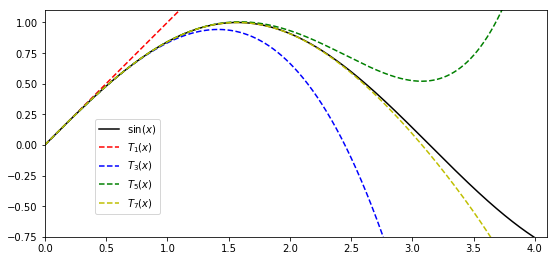

In [13]:
xvals = np.linspace(0,4,int(2e4))

ex_vals = np.sin(xvals)

t1_app = [tn_approx(xval,0) for xval in xvals]
t2_app = [tn_approx(xval,1) for xval in xvals]
t3_app = [tn_approx(xval,2) for xval in xvals]
t4_app = [tn_approx(xval,3) for xval in xvals]

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(xvals,ex_vals,ls="-", color="k", label="$\sin(x)$")
plt.plot(xvals,t1_app,ls="--", color="r", label="$T_{1}(x)$")
plt.plot(xvals,t2_app,ls="--", color="b", label="$T_{3}(x)$")
plt.plot(xvals,t3_app,ls="--", color="g", label="$T_{5}(x)$")
plt.plot(xvals,t4_app,ls="--", color="y", label="$T_{7}(x)$")

plt.legend(loc=(.1,.1))

plt.xlim(0,4.1)
plt.ylim(-.75,1.1)

ax.set_aspect("equal")

fig=plt.gcf() # get current figure
fig.set_size_inches(9,7) # optional size

So, looking at the above figure, we see how adding more terms to the truncated Taylor series expansion improves the overall accuracy of the approximation.  That being said, as you can see, no matter how many terms you add, at some point, the approximation will deviate significantly with the true solution.  Therefore, it would be nice to have a means of knowing in advance how well a given approximation will do over a chosen interval.  This is the point of what is called _Taylor's Remainder Theorem_, which we address in the next section.  

In this vein though, let's see how we can use Taylor series to make a hard problem tractable.  Suppose I ask you to find 

$$
I = \int_{0}^{\pi/2}\cos(\cos(x))dx.
$$

If we ask Python for the answer, we get something like:

In [8]:
print(spqd.quad(lambda x: np.cos(np.cos(x)), 0, np.pi/2.))

(1.2019697153172066, 1.3344544528473075e-14)


So we found, at least to very high accuracy, that 

$$
I = 1.2019697153172066
$$

Now, suppose we just use the associated 2nd order Taylor series expansion around $x_{0}=0$ of the integrand.  In other words, find $T_{2}(x;0)$ for $\cos(\cos(x))$.

_ Problem _: Find $T_{2}(x;0)$ for $\cos(\cos(x))$ where

$$
T_{2}(x;0) = \sum_{j=0}^{2} \left.\frac{d^{j}}{dx^{j}}\cos(\cos(x)) \right|_{x_{0}=0}\frac{x^{j}}{j!}
$$

So, given that we have 

$$
\cos(\cos(x)) \approx \cos(1) + \frac{\sin(1)}{2}x^{2},
$$

we can then try to use this to approximate $I$ via the integral

$$
I \approx \int_{0}^{\pi/2}\left(\cos(1) + \frac{\sin(1)}{2}x^{2} \right) dx = \cos(1)\frac{\pi}{2} + \frac{\sin(1)}{6}\left(\frac{\pi}{2}\right)^{3}.
$$

Using Python, we then get from the right hand side

In [11]:
print np.cos(1.)*np.pi/2. + np.sin(1.)/6.*(np.pi/2)**3.

1.3922649226956114


In [ ]:
xvals = np.linspace(0,np.pi/2.,int(2e4))
tr_func = np.cos(np.cos(xvals))
T2_func = (np.cos(1) + np.sin(1)/2.*xvals**2.) 

plt.plot(xvals,tr_func,ls="-", color="k", label="$\cos(\cos(x)$")
plt.plot(xvals,T2_func,ls="--", color="b", label="$T_{2}(x)$")

plt.legend(loc=(.1,.8))

plt.xlim(0,np.pi/2.)
plt.ylim(.5,1.61)

#plt.axes().set_aspect("equal")

fig=plt.gcf() # get current figure
fig.set_size_inches(9,7) # optional size

Thus, the approximation we use gives us a result of 

$$
I \approx 1.3922649227
$$

which, while in the ballpark, is clearly not great.  So how might we improve our estimate?  Well, we note that 

$$
I = \int_{0}^{\pi/4}\cos(\cos(x))dx + \int_{\pi/4}^{\pi/2}\cos(\cos(x))dx.
$$

Now, if we use $T_{2}(x;0)$ for the first integral, we then get 

$$
\int_{0}^{\pi/4}\cos(\cos(x))dx \approx \cos(1)\frac{\pi}{4} + \frac{\sin(1)}{6}\left(\frac{\pi}{4}\right)^{3}.
$$

Now, as for the second integral, suppose we use $T_{2}(x;\pi/4)$, or 

$$
T_{2}(x;\pi/4) = \sum_{j=0}^{2}\left.\frac{d^{j}}{dx^{j}}\cos(\cos(x))\right|_{x=\pi/4}\frac{(x-\pi/4)^{j}}{j!}
$$

_Problem_: Find $T_{2}(x;\pi/4)$ from above.  

So, having found 

$$
T_{2}(x;\pi/4) = \cos\left(\frac{1}{\sqrt{2}}\right) + \frac{1}{\sqrt{2}}\sin\left(\frac{1}{\sqrt{2}}\right)\left(x-\frac{\pi}{4} \right) + \frac{1}{2}\left(\frac{1}{\sqrt{2}}\sin\left(\frac{1}{\sqrt{2}}\right)-\frac{1}{2}\cos\left(\frac{1}{\sqrt{2}}\right) \right)\left(x-\frac{\pi}{4}\right)^{2}
$$

we now want to use this so that we can get the approximation

$$
\int_{\pi/4}^{\pi/2} \cos(\cos(x))dx \approx \int_{\pi/4}^{\pi/2}T_{2}(x;\pi/4)dx.
$$

To make this as efficient as possible, might I suggest writing

$$
T_{2}(x) = a + b(x-\pi/4) + c(x-\pi/4)^{2},
$$

where

\begin{align*}
a = & \cos\left(\frac{1}{\sqrt{2}}\right),\\
b = & \frac{1}{\sqrt{2}}\sin\left(\frac{1}{\sqrt{2}}\right),\\
c = & \frac{1}{2}\left(\frac{1}{\sqrt{2}}\sin\left(\frac{1}{\sqrt{2}}\right)-\frac{1}{2}\cos\left(\frac{1}{\sqrt{2}}\right) \right).
\end{align*}

Then, using the variable transformation $u = x-\pi/4$, we get the identity

$$
\int_{\pi/4}^{\pi/2} T_{2}(x;\pi/4)dx = \int_{0}^{\pi/4} (a + bu + cu^{2}) du, 
$$

so that we readily can see that 

$$
\int_{\pi/4}^{\pi/2} \cos(\cos(x))dx \approx a\frac{\pi}{4} + \frac{b}{2}\left(\frac{\pi}{4}\right)^{2}  + \frac{c}{3}\left(\frac{\pi}{4}\right)^{3}. 
$$

Turning to Python again, we can then readily put everything together. 

In [13]:
sq2 = 1./np.sqrt(2.)
p4 = np.pi/4.
p42 = p4**2.
p43 = p42*p4
a = np.cos(sq2)
b = sq2*np.sin(sq2)
c = (b - a/2.)/2.

I1 = np.cos(1.)*p4 + np.sin(1.)*p43/6.
I2 = p4*a + p42*b/2. + p43*c/3.
Ia = I1+I2

print Ia

1.237469459508027


In [ ]:
Nvals = int(2e4)

xvals = np.linspace(0,np.pi/2.,Nvals)
xvalsl = np.linspace(0,np.pi/4.,Nvals)
xvalsr = np.linspace(np.pi/4.,np.pi/2.,Nvals)

tr_func = np.cos(np.cos(xvals)) 
T2_func = (np.cos(1) + np.sin(1)/2.*xvalsl**2.)
T2a_func = (a+b*(xvalsr-np.pi/4.) + c*(xvalsr-np.pi/4.)**2.)

plt.plot(xvals,tr_func,ls="-", color="k", label="$\cos(\cos(x))$")
plt.plot(xvalsl,T2_func,ls="--", color=, label=)
plt.plot(xvalsr,T2a_func,ls="--", color=, label=)

plt.legend(loc=(.1,.8))

plt.xlim(0,np.pi/2.)
plt.ylim(.5,1.18)

#plt.axes().set_aspect("equal")

fig=plt.gcf() # get current figure
fig.set_size_inches(9,7) # optional size